# Logistic Regression in TensorFlow

## 1.1 Introduction

Logistic Regression is a classification algorithm commonly used in Machine Learning. It allows categorizing data into discrete classes by learning the relationship from the given set of labeled data. It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of sigmoid function.
<br><br>
In case of Logistic Regression, the hypothesis is the sigmoid of a straight line, i.e, 
<br>
<div style="margin:10px;font-size:25px; font-weight:400;" align="left">
    h(x) = σ(wx + b)
    <br><br>
    σ(z) = 1/(1+e<sup>-z</sup>)
</div>
where <b>W</b> is the weight vector and <b>b</b> is the bias

<img src="images/05_neuron.png">

## 1.2 Code

### Imports

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt

Let us visualize the Sigmoid Function

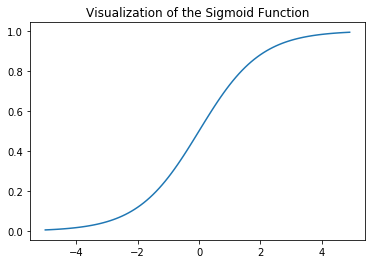

In [2]:
def sigmoid(z): 
    return 1 / (1 + np.exp( - z)) 
  
plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1))) 
plt.title('Visualization of the Sigmoid Function') 
  
plt.show() 

Note that the range of the Sigmoid function is (0, 1) which means that the resultant values are in between 0 and 1. This property of Sigmoid function makes it a really good choice of Activation Function for Binary Classification. Also for z = 0, Sigmoid(z) = 0.5 which is the midpoint of the range of Sigmoid function.

### Cost Function

Just like Linear Regression, we need to find the optimal values of w and b for which the cost function J is minimum. In this case, we will be using the Sigmoid Cross Entropy cost function which is given by
<img src="images/05_cost.svg" style="width:700px; height:50px; margin-top:10px;">

This cost function will then be optimized using Gradient Descent.

### Dataset

In [3]:
data = pd.read_csv('dataset/Iris.csv') 
print("Data Shape:", data.shape) 
  
data.head()

Data Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
labels = data["Species"].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
def edit_labels(x):
    if x == "Iris-setosa":
        return 0.0
    elif x == "Iris-versicolor":
        return 1.0
    elif x == "Iris-virginica":
        return 2.0

In [6]:
data["Species"] = data["Species"].apply(lambda x: edit_labels(x))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0


Now let’s get the feature matrix and the corresponding labels and visualize.

In [7]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values
x_orig = x_orig[:100]
  
# Data labels 
y_orig = data.iloc[:, -1:].values
y_orig = y_orig[:100]
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape)

Shape of Feature Matrix: (100, 4)
Shape Label Vector: (100, 1)


Visualize the given data.

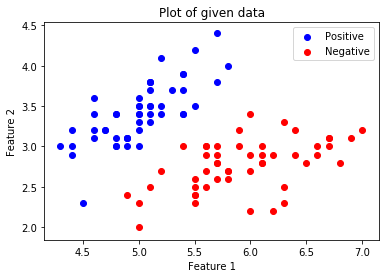

In [8]:
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 1]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show()

In [9]:
x = x_orig
y = y_orig

_, m = x.shape
_, n = y.shape

print("X: ", x.shape)
print("Y: ", y.shape)

X:  (100, 4)
Y:  (100, 1)


### Hyperparameters

In [37]:
lr = 0.05
epochs = 50
display_step = 10

### Model
Creating placeholders for feeding the data.

In [38]:
# Placeholders
X = tf.placeholder(tf.float32, shape=[None, m], name="Input")
Y = tf.placeholder(tf.float32, shape=[None, n], name="Output")

  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([m, n])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([n]))

Now delcare the Hypothesis, Cost function, Optimizer.

In [39]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)  

### Training

In [40]:
# Global Variables Initializer 
init = tf.global_variables_initializer()


# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
        
        _, c = sess.run([optimizer, cost], feed_dict = {X : x, Y : y})
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.round(Y_hat), Y) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(c)
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if (epoch +1)% display_step == 0 and epoch != 0:
            print("Epoch: {:4.0f} - Cost: {:0.5f} - Acc: {:0.5f}".format(epoch+1, c, accuracy_history[-1]))
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch:   10 - Cost: 0.70766 - Acc: 50.00000
Epoch:   20 - Cost: 0.69352 - Acc: 50.00000
Epoch:   30 - Cost: 0.68172 - Acc: 50.00000
Epoch:   40 - Cost: 0.67081 - Acc: 53.00000
Epoch:   50 - Cost: 0.66039 - Acc: 73.00000

Accuracy: 73.00000190734863 %


Let’s plot the change of cost over the epochs

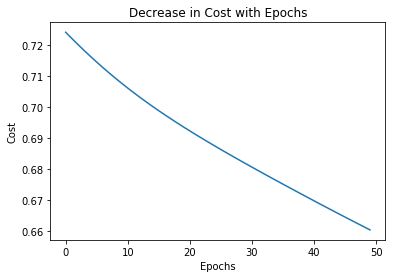

In [41]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show()

Plot the change of accuracy over the epochs.

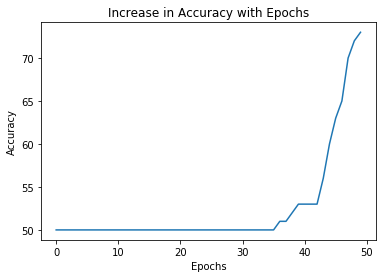

In [42]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show()